In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

## loading data

In [2]:
data = pd.read_csv('Data-Melbourne_F_fixed.csv')
data.head()

,Serial No.,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7


## fisrt column droppped because it contains serial number

In [3]:
data = data.drop(data.columns[0], axis=1)
data.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7


## Create a new target variable 'Operational_Status'

In [4]:
def create_operational_status(data):
    optimal_conditions = (
        (data['Ammonia'] < 30) & 
        (data['Biological Oxygen Demand'] < 400) & 
        (data['Chemical Oxygen Demand'] < 800) & 
        (data['Total Nitrogen'] < 70)
    )
    data['Operational_Status'] = np.where(optimal_conditions, 1, 0)

create_operational_status(data)

## Exploring the data and removing any null values if necessary

In [5]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
Operational_Status          0
dtype: int64


### This thing clearly shows no missing values in the data

## Now lets go through data calculating mean median variance

In [6]:
data.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,Operational_Status
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660,0.065847
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422,0.248104
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000,0.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000,0.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000,0.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000,1.000000


## Checking for skewness in different columns

In [7]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    skewness = data[column].skew()
    print(f"Skewness of {column}: {skewness:.2f}")

Skewness of Average Outflow: 0.38
Skewness of Average Inflow: 3.75
Skewness of Energy Consumption: -0.15
Skewness of Ammonia: 0.31
Skewness of Biological Oxygen Demand: 1.23
Skewness of Chemical Oxygen Demand: 0.74
Skewness of Total Nitrogen: -0.26
Skewness of Average Temperature: 0.55
Skewness of Maximum temperature: 0.49
Skewness of Minimum temperature: 0.50
Skewness of Atmospheric pressure: 16.55
Skewness of Average humidity: -0.81
Skewness of Total rainfall: 8.76
Skewness of Average visibility: 22.20
Skewness of Average wind speed: 0.83
Skewness of Maximum wind speed: 0.55
Skewness of Year: 0.10
Skewness of Month: 0.13
Skewness of Day: 0.04
Skewness of Operational_Status: 3.50


In [8]:
from scipy import stats
# Function to apply transformations based on skewness
def correct_skewness(df):
    for column in df.columns:
        skewness = df[column].skew()
        if skewness > 1:  # Highly right-skewed
            df[column] = np.log1p(df[column])  # Log transformation
        elif skewness < -1:  # Highly left-skewed
            df[column] = np.expm1(df[column])  # Exponential transformation
        elif skewness > 0:  # Moderately right-skewed
            df[column] = np.sqrt(df[column])  # Square root transformation
        elif skewness < 0:  # Moderately left-skewed
            df[column] = np.cbrt(df[column])  # Cube root transformation

# Apply skewness correction to the existing DataFrame 'data'
correct_skewness(data)

# Display corrected data and their new skewness values
print("Corrected Data:")
data

Corrected Data:


C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,Operational_Status
0,1.714934,1.277874,56.025499,5.196152,5.902633,27.018512,3.923072,4.393177,5.009990,3.549648,0.0,3.825862,0.924259,2.397895,5.186521,7.314369,44.877611,1.00000,1.000000,0.693147
1,1.713476,1.376497,56.631458,5.000000,5.916202,27.202941,3.915433,4.135215,4.857983,3.507136,0.0,3.979057,0.000000,2.397895,3.794733,5.272571,44.877611,1.00000,1.414214,0.693147
2,1.711140,1.441019,58.676192,6.480741,6.037871,28.913665,4.010846,4.098780,5.215362,2.966479,0.0,3.608826,0.223144,2.397895,5.648008,7.816649,44.877611,1.00000,2.236068,0.000000
3,1.711140,1.471095,59.206877,6.000000,6.066108,29.154759,3.979057,3.820995,4.460942,3.331666,0.0,3.659306,0.000000,2.397895,5.196152,6.236986,44.877611,1.00000,2.449490,0.000000
4,1.707923,1.567365,58.754317,6.782330,6.232448,31.874755,4.032854,3.660601,4.370355,2.828427,0.0,4.020726,0.000000,2.397895,4.538722,5.932959,44.877611,1.00000,2.645751,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2.251222,1.743269,67.382090,5.291503,5.739793,25.690465,3.888747,2.607681,3.162278,2.000000,0.0,3.825862,0.000000,2.397895,3.794733,4.711688,44.933284,2.44949,4.472136,0.693147
1378,2.425283,1.873339,66.452205,6.324555,5.525453,26.457513,3.929407,2.756810,4.000000,1.732051,0.0,4.140818,0.000000,0.000000,3.674235,5.089204,44.933284,2.44949,4.898979,0.000000
1379,2.153602,1.759753,67.530795,6.855655,5.564520,29.325757,4.000000,3.114482,4.000000,1.732051,0.0,4.020726,0.000000,2.397895,4.254409,5.089204,44.933284,2.44949,5.000000,0.000000
1380,2.317973,1.779856,68.161310,6.782330,5.707110,30.000000,3.968058,3.301515,4.123106,2.236068,0.0,4.020726,0.000000,2.397895,4.679744,5.932959,44.933284,2.44949,5.099020,0.000000


## the skewness in the data has been corrected

In [9]:
print("\nNew Skewness Values:")
data.skew()


New Skewness Values:


Average Outflow             -2.112045
Average Inflow               1.870822
Energy Consumption          -0.481928
Ammonia                     -0.196382
Biological Oxygen Demand     0.244794
Chemical Oxygen Demand       0.238527
Total Nitrogen              -0.868719
Average Temperature         -0.280018
Maximum temperature         -0.760394
Minimum temperature         -0.345608
Atmospheric pressure        16.552901
Average humidity            -4.044794
Total rainfall               5.438966
Average visibility          -1.023746
Average wind speed          -0.135672
Maximum wind speed          -0.428100
Year                         0.097328
Month                       -0.308001
Day                         -0.456557
Operational_Status           3.504848
dtype: float64

## these are new values of skewness

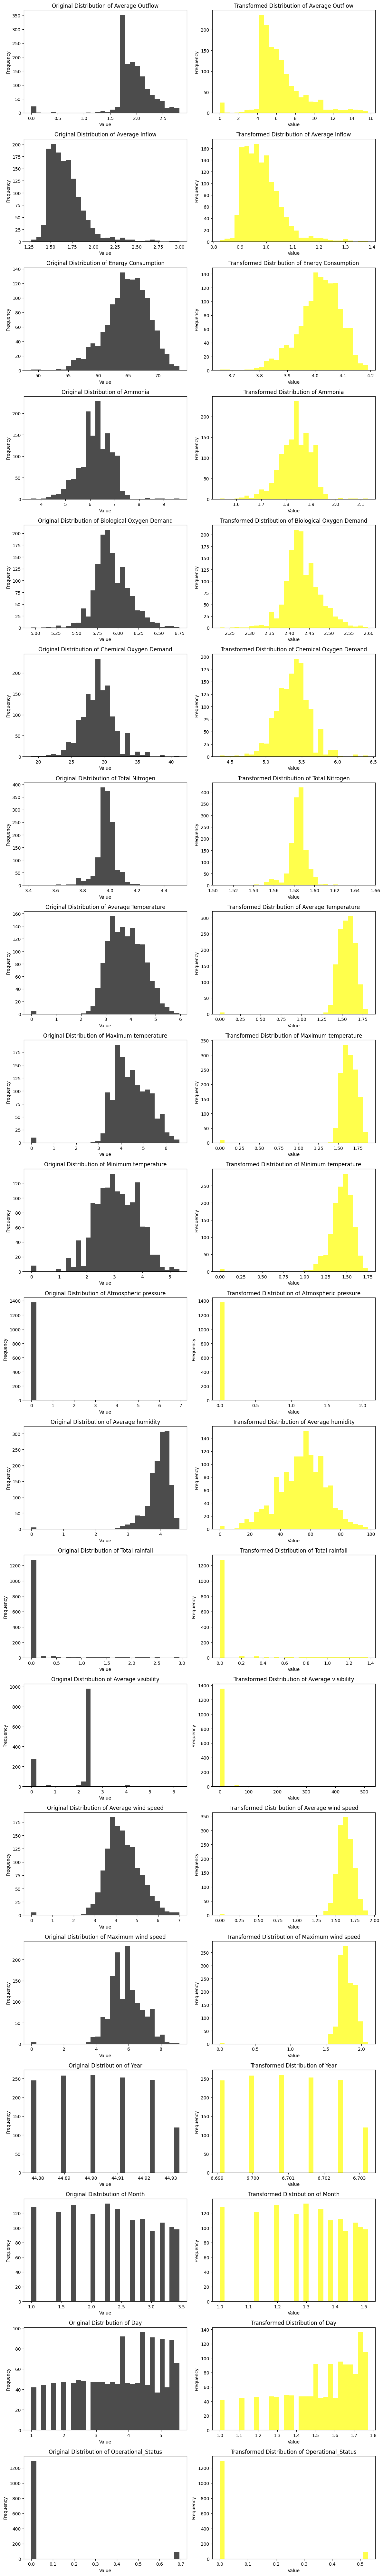

In [10]:
# Function to plot histograms before and after transformation
def plot_distributions(original_df, transformed_df):
    num_columns = original_df.shape[1]
    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(12, 4 * num_columns))

    for i, column in enumerate(original_df.columns):
        axes[i, 0].hist(original_df[column], bins=30, color='black', alpha=0.7)
        axes[i, 0].set_title(f'Original Distribution of {column}')
        axes[i, 0].set_xlabel('Value')
        axes[i, 0].set_ylabel('Frequency')

        # Plot transformed data
        axes[i, 1].hist(transformed_df[column], bins=30, color='yellow', alpha=0.7)
        axes[i, 1].set_title(f'Transformed Distribution of {column}')
        axes[i, 1].set_xlabel('Value')
        axes[i, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
original_data = data.copy()
correct_skewness(data)
plot_distributions(original_data, data) 

## creating new features in the data

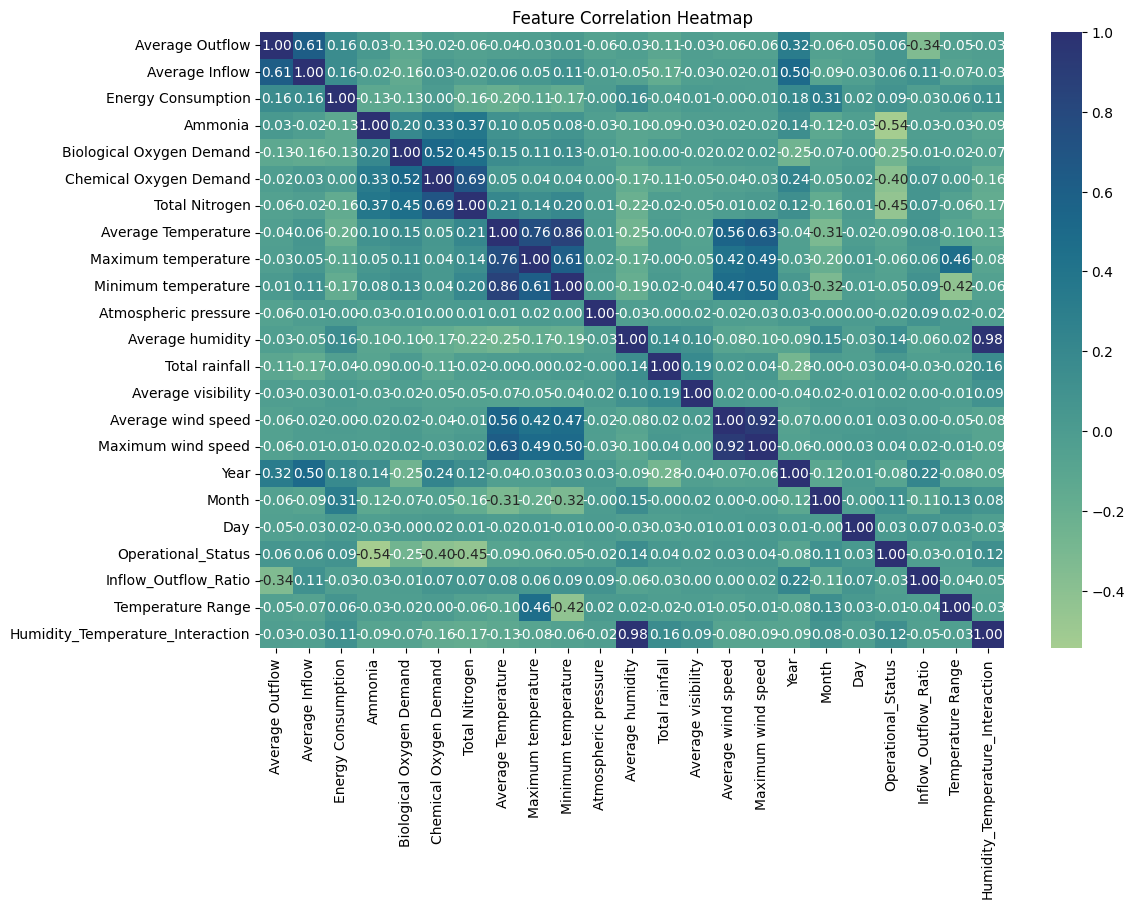

In [11]:
#  Inflow/Outflow Ratio
if 'Average Inflow' in data.columns and 'Average Outflow' in data.columns:
    data['Inflow_Outflow_Ratio'] = data['Average Inflow'] / (data['Average Outflow'] + 1e-5)

#  Temperature Range
if 'Maximum temperature' in data.columns and 'Minimum temperature' in data.columns:
    data['Temperature Range'] = data['Maximum temperature'] - data['Minimum temperature']

#  Humidity/Temperature Interaction
if 'Average humidity' in data.columns and 'Average Temperature' in data.columns:
    data['Humidity_Temperature_Interaction'] = data['Average humidity'] * data['Average Temperature']
# Check correlations after creating new features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="crest")
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
# Define features and target
X = data.drop(columns=['Operational_Status'])  # Drop target column
y = data['Operational_Status']
y.unique()
y = np.where(y > 0.5, 1, 0)  
bins = [0, 10, 20, 30] 
labels = [0, 1, 2]
y = pd.cut(y, bins=bins, labels=labels)
y = y.fillna(0)  
y = y.astype(int)

## Synthetic Minority Oversampling Technique

In [13]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
#Impute missing values
imputer = SimpleImputer(strategy='mean') 
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
#Convert continuous target variable to categorical
threshold = data_imputed.iloc[:, -1].median() 
data_imputed.iloc[:, -1] = (data_imputed.iloc[:, -1] > threshold).astype(int)
X = data_imputed.iloc[:, :-1] 
y = data_imputed.iloc[:, -1]   

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


##  Now X_resampled and y_resampled can be used for training your model

In [14]:
from collections import Counter
print("Class Distribution After SMOTE:", Counter(y_resampled))

Class Distribution After SMOTE: Counter({0.0: 692, 1.0: 692})


## Verify new class distribution(which is done above)

## Feature Selection using Recursive Feature Elimination (RFE)

In [15]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')
rfe.fit(X_resampled, y_resampled)

RFECV(cv=5, estimator=LogisticRegression(max_iter=1000), scoring='accuracy')

## feature selction

In [16]:
selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features.tolist())

Selected Features: ['Average Temperature', 'Maximum temperature', 'Minimum temperature', 'Average humidity', 'Average wind speed', 'Month', 'Day', 'Temperature Range']


## Split the data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# this the logistic regression model training from scratch

In [18]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Convert probabilities to binary outputs (0 or 1)
        return np.where(y_predicted >= 0.5, 1, 0)

In [19]:
 # Train logistic regression model
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

    # Predict on test data
y_pred = model.predict(X_test)

    # Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.855595667870036


#### Training the data on different kinds of model and picking out insinghts based on them as well as checking their accuracy using f1 score and doing hyperparameter tuning

In [20]:
# Train and evaluate multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")
    print(f"F1 Score: {f1_score(y_test, preds, average='binary'):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds)}")
    print(f"Classification Report:\n{classification_report(y_test, preds)}")


Model: Logistic Regression
Accuracy: 0.89
F1 Score: 0.88
Confusion Matrix:
[[138   0]
 [ 30 109]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       138
         1.0       1.00      0.78      0.88       139

    accuracy                           0.89       277
   macro avg       0.91      0.89      0.89       277
weighted avg       0.91      0.89      0.89       277


Model: KNN
Accuracy: 0.92
F1 Score: 0.92
Confusion Matrix:
[[127  11]
 [ 10 129]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       138
         1.0       0.92      0.93      0.92       139

    accuracy                           0.92       277
   macro avg       0.92      0.92      0.92       277
weighted avg       0.92      0.92      0.92       277


Model: Decision Tree
Accuracy: 0.99
F1 Score: 0.99
Confusion Matrix:
[[138   0]
 [  4 135]]
Classification Report:
  

###  Hyperparameter Tuning for Random Forest

In [21]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search.best_params_)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [22]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}


### training multiple models after hyperparametere tuning

In [23]:
svc = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10),
    "Random Forest": RandomForestClassifier(n_estimators=100,min_samples_split=5, max_depth=None, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)

}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")
    print(f"F1 Score: {f1_score(y_test, preds, average='binary'):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds)}")
    print(f"Classification Report:\n{classification_report(y_test, preds)}")
    


Model: Logistic Regression
Accuracy: 0.89
F1 Score: 0.88
Confusion Matrix:
[[138   0]
 [ 30 109]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       138
         1.0       1.00      0.78      0.88       139

    accuracy                           0.89       277
   macro avg       0.91      0.89      0.89       277
weighted avg       0.91      0.89      0.89       277


Model: KNN
Accuracy: 0.92
F1 Score: 0.92
Confusion Matrix:
[[127  11]
 [ 10 129]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       138
         1.0       0.92      0.93      0.92       139

    accuracy                           0.92       277
   macro avg       0.92      0.92      0.92       277
weighted avg       0.92      0.92      0.92       277


Model: Decision Tree
Accuracy: 0.99
F1 Score: 0.99
Confusion Matrix:
[[138   0]
 [  4 135]]
Classification Report:
  